In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import collections
import re, string
import sys
import time
from nltk.corpus import stopwords
import seaborn as sns
#from wordcloud import WordCloud
#from mpl_toolkits.basemap import Basemap

from subprocess import check_output
%matplotlib inline

In [3]:
import json

def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

In [5]:
%%time

yelp_review= read_json('/Users/gardasnagarjun/Downloads/yelp_dataset/review.json')

CPU times: user 2min 7s, sys: 53.9 s, total: 3min 1s
Wall time: 3min 54s


In [6]:
%%time

yelp_business= read_json('/Users/gardasnagarjun/Downloads/yelp_dataset/business.json')

CPU times: user 6.38 s, sys: 603 ms, total: 6.98 s
Wall time: 7.17 s


In [7]:
yelp_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [8]:
yelp_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{u'GoodForKids': u'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{u'GoodForMeal': u'{'dessert': False, 'latenig...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{u'Monday': u'9:0-0:0', u'Tuesday': u'9:0-0:0'...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{u'GoodForMeal': u'{'dessert': False, 'latenig...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{u'Monday': u'17:30-21:30', u'Friday': u'17:30...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{u'Friday': u'8:0-17:0', u'Tuesday': u'8:0-17:...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{u'BusinessAcceptsCreditCards': u'True', u'Bus...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{u'Monday': u'7:0-23:0', u'Tuesday': u'7:0-23:...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [9]:
useful_reviews = len(yelp_review[yelp_review["useful"]>0])
cool_reviews = len(yelp_review[yelp_review["cool"]>0])
funny_reviews = len(yelp_review[yelp_review["funny"]>0])
negative_reviws = len(yelp_review[yelp_review["stars"]<2])
positive_reviews =len(yelp_review[yelp_review["stars"]>3])
total_reviews = len(yelp_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviws))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 6685900
Useful reviews: 3115446
Funny reviews: 1373727
Cool reviews: 1672612
Total negative reviews: 1002159
Total positive reviews: 4402067


In [10]:
top_reviewed = yelp_review[yelp_review["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] =top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

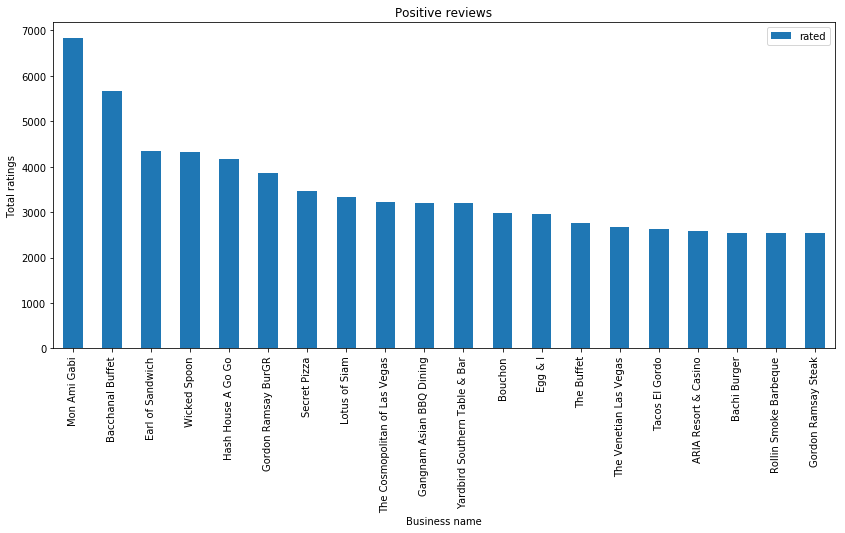

In [11]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

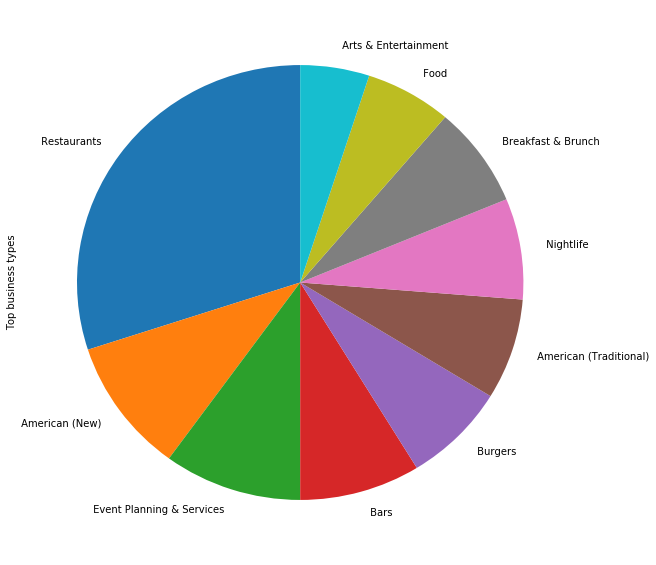

In [12]:
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = top_business_data.sort_values("rated")[::-1][:top_business]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90)

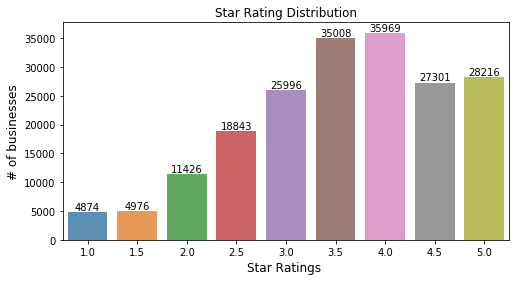

In [14]:
# Trying to plot Rating Distribution.
#Get the distribution of the ratings
import seaborn as sns
x=yelp_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [15]:
#Gathering some insights about Negative Trending.
bottom_reviewed = yelp_review[yelp_review["stars"]<2]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

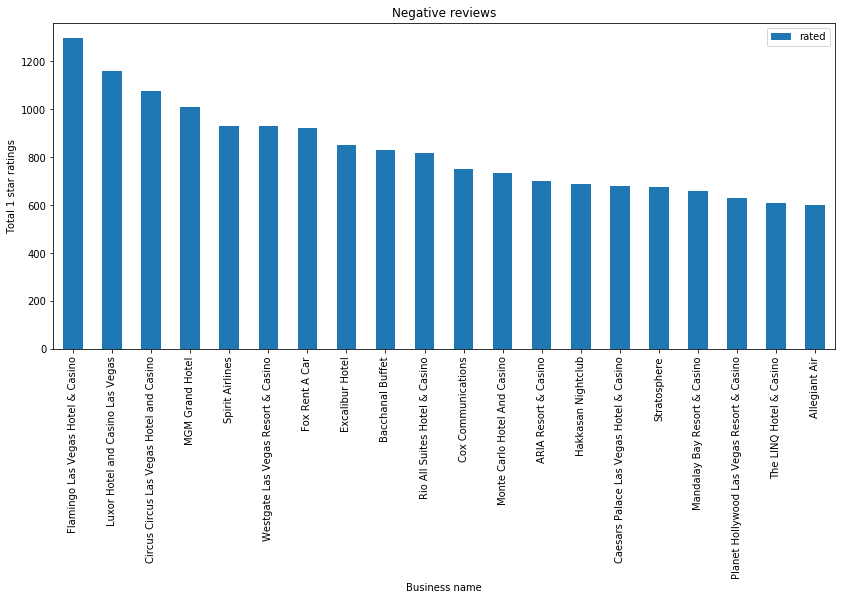

In [17]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)


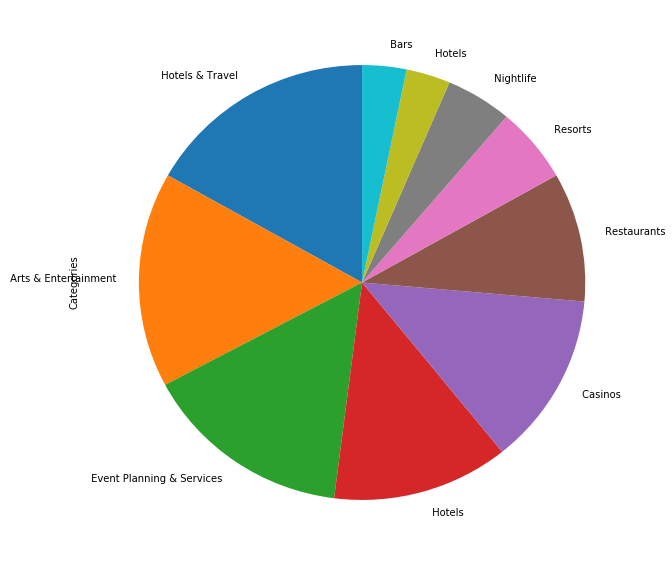

In [18]:
#https://www.kaggle.com/vksbhandary/exploring-yelp-reviews-dataset
num_cat =10 # to show top 10 catrgories
bottom_business = 30 # choose categories of top 30 businesses
cat_data = bottom_business_data.sort_values("rated")[::-1][:bottom_business]

Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
bottom_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
bottom_categories.reset_index(inplace=True)
bottom_categories.columns = ['category', 'occurance']

x_val=bottom_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=bottom_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Categories')
series.plot.pie(figsize=(10, 10),startangle=90)